## Ridge regression

In [15]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#### Declare some visual functions

In [16]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()

#### Select feature

##### Read data

- Training set

In [17]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Floors,Rooms,Toilets,Furnishing Sell,Price,Category_Encoded,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.399917,4.006730,10.099505,2.236068,1.032351,4,6,8.0,0.0,0.0,0.0,0.0,-2.025953,0.0,1,0,0,0,0
1,10.400602,4.003590,10.000000,2.236068,0.379865,4,5,6.0,0.0,0.0,0.0,0.0,-1.983376,0.0,1,1,0,0,1
2,10.398891,4.009621,10.000000,2.236068,0.379865,4,5,4.0,0.0,0.0,0.0,0.0,-1.983376,0.0,0,1,0,0,1
3,10.399521,4.008289,8.660254,2.236068,-0.707613,4,6,4.0,0.0,0.0,0.0,0.0,-1.968349,0.0,0,0,0,0,1
4,10.400602,3.996527,12.369317,2.236068,2.554821,1,1,5.0,0.0,0.0,0.0,0.0,-1.900727,0.0,1,0,0,1,0


##### Input variables

- Training set

In [18]:
x = df.drop(columns=["Price", "Legal Status", "Width (m)"])
x.head()

,Longitude,Latitude,Area (m²),Length (m),Land Type,House Direction,Floors,Rooms,Toilets,Furnishing Sell,Category_Encoded,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.399917,4.006730,10.099505,1.032351,4,8.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
1,10.400602,4.003590,10.000000,0.379865,4,6.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
2,10.398891,4.009621,10.000000,0.379865,4,4.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
3,10.399521,4.008289,8.660254,-0.707613,4,4.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
4,10.400602,3.996527,12.369317,2.554821,1,5.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0


##### Target variables

- Training set

In [19]:
y = df[['Price']]
y.head()

,Price
0,-2.025953
1,-1.983376
2,-1.983376
3,-1.968349
4,-1.900727


##### Divide into 2 training sets and validation sets

 - Split data

In [20]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=554)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(3898, 16) (975, 16)
(3898, 1) (975, 1)


#### Select Alpha coefficient

In [21]:
alpha_range = np.arange(0.05, 1, 0.05)
models = {}

def _regression(alpha, X_train, y_train, X_validation, y_validation, models: dict):
    dict_models = {}
    rid_regr = Ridge(alpha=alpha)
    rid_regr.fit(X_train, y_train)
    y_pred = rid_regr.predict(X_validation)
    MSE = np.mean((y_validation-y_pred)**2)
    dict_models["MSE"] = MSE
    dict_models["model"] = rid_regr
    model_name = "ridge_" + str(alpha)
    models[model_name] = dict_models
    return models

for alpha in alpha_range:
  models = _regression(round(alpha, 2), X_train, y_train, X_validation, y_validation, models)

# Print out the model with the best alpha coefficient (smallest MSE)
i = 0
for k, v in models.items():
  if i==0:
    best_model = k
    mse = models[k]["MSE"]
  if models[k]["MSE"] < mse:
    best_model = k
  print("model {}, MSE: {}".format(k, models[k]["MSE"]))
  i+=1

print("-----------------------------------------")
print("Best models: {}, MSE: {}".format(best_model, models[best_model]["MSE"]))


model ridge_0.05, MSE: 0.687789689355378
model ridge_0.1, MSE: 0.7115433617995743
model ridge_0.15, MSE: 0.7215837178476007
model ridge_0.2, MSE: 0.7272622935697696
model ridge_0.25, MSE: 0.7309566546972025
model ridge_0.3, MSE: 0.7335702769983774
model ridge_0.35, MSE: 0.7355267199730445
model ridge_0.4, MSE: 0.737052429466462
model ridge_0.45, MSE: 0.7382799704227021
model ridge_0.5, MSE: 0.7392923122131364
model ridge_0.55, MSE: 0.740144125622773
model ridge_0.6, MSE: 0.7408729404783093
model ridge_0.65, MSE: 0.7415053954269568
model ridge_0.7, MSE: 0.7420609321708524
model ridge_0.75, MSE: 0.7425540780832676
model ridge_0.8, MSE: 0.7429959100597466
model ridge_0.85, MSE: 0.743395023530889
model ridge_0.9, MSE: 0.7437581917074434
model ridge_0.95, MSE: 0.7440908249205518
-----------------------------------------
Best models: ridge_0.05, MSE: 0.687789689355378


*Vậy với Alpha 0.05 sẽ cho mô hình tối ưu nhất*

#### Model training

##### 4.1 Create a Ridge Regression model object from the linear_model library and train it with input and target variables

In [22]:
ridge_regression = Ridge(alpha=0.05)
ridge_regression.fit(X_train, y_train)


Ridge(alpha=0.05)

##### Real estate price prediction

- Prediction on validation set

In [23]:
y_pred_validation = ridge_regression.predict(X_validation)
y_pred_validation

array([[-0.49461478],
       [-0.42353267],
       [-0.19952711],
       [ 0.58803506],
       [ 0.02610552],
       [-0.67964656],
       [-0.44272222],
       [ 0.1302615 ],
       [-0.21041612],
       [-0.11612929],
       [-0.17402117],
       [-0.49083479],
       [ 0.2737092 ],
       [-0.24655938],
       [-0.03280063],
       [-0.40306473],
       [-1.02062131],
       [-0.46937932],
       [-0.16575389],
       [-0.23078231],
       [-0.00782425],
       [ 0.63762271],
       [ 0.92016305],
       [-0.28168411],
       [-0.10964755],
       [-0.12006534],
       [-0.63786513],
       [-0.06718035],
       [-0.28631438],
       [-0.54848533],
       [-0.71896618],
       [ 0.38099466],
       [-0.16610795],
       [ 0.07082557],
       [-0.40139025],
       [ 0.61414015],
       [ 0.18243809],
       [ 0.6020889 ],
       [-0.21199634],
       [-0.08641142],
       [-0.34885025],
       [-0.00220738],
       [-0.31009705],
       [-0.73800219],
       [-0.50379309],
       [-0

- On the train set

In [24]:
y_pred_train = ridge_regression.predict(X_train)
y_pred_train

array([[ 0.83019495],
       [ 0.09923517],
       [-0.37774908],
       ...,
       [ 0.15598075],
       [-0.18600147],
       [ 0.73555881]])

##### Model evaluation based on MSE and R-squared

- Review on Train

In [25]:
# Calculate MSE
mse_ridge_train = mean_squared_error(y_train, y_pred_train)

# Calculate R-squared
r2_ridge_train = r2_score(y_train, y_pred_train)

# Calculate MAPE
n = len(y_train)
mape = (1/n) * np.sum((np.abs((y_pred_train - y_train) / y)) * 100, axis=0)

print("Train Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge_train)
print("R-squared of Ridge Model:", r2_ridge_train * 100)
print("MAPE of Ridge Model:", mape)

Train Set:
Mean Squared Error (MSE) of Ridge Model: 0.6430086882260422
R-squared of Ridge Model: 35.251336670747676
MAPE of Ridge Model: Price    207.910695
dtype: float64


- Evaluation on the Validation set

In [26]:
# Calculate MSE
mse_ridge = mean_squared_error(y_validation, y_pred_validation)

# Calculate R-squared
r2_ridge = r2_score(y_validation, y_pred_validation)

# Calculate MAPE
n = len(y_validation)
mape = (1/n) * np.sum((np.abs((y_pred_validation - y_validation) / y)) * 100, axis=0)

print("Validation Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge)
print("R-squared of Ridge Model:", r2_ridge * 100)
print("MAPE of Ridge Model:", mape)

Validation Set:
Mean Squared Error (MSE) of Ridge Model: 0.687789689355378
R-squared of Ridge Model: 32.94624735252396
MAPE of Ridge Model: Price    218.421178
dtype: float64


#### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

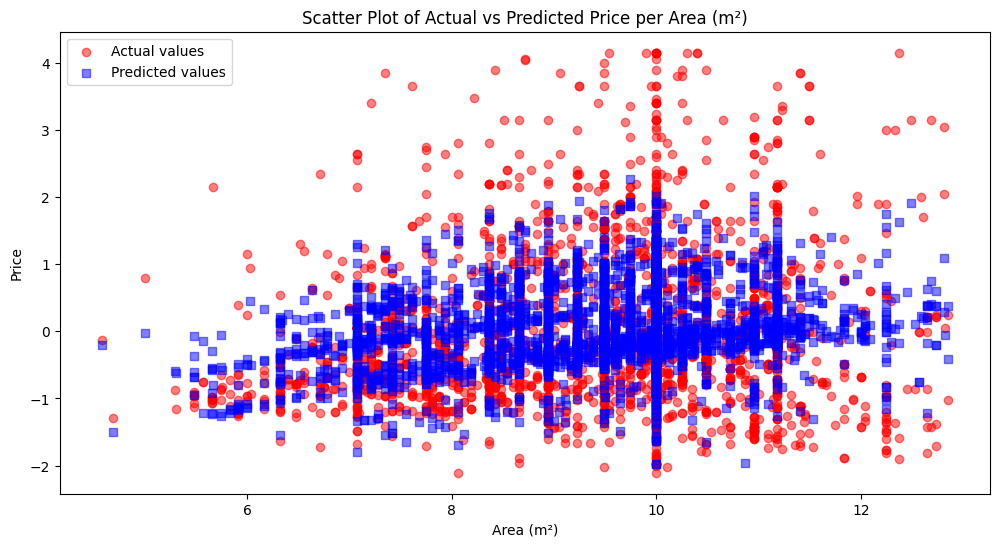

In [27]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area (m²)", "Area (m²)", "Price")

- Validation set 

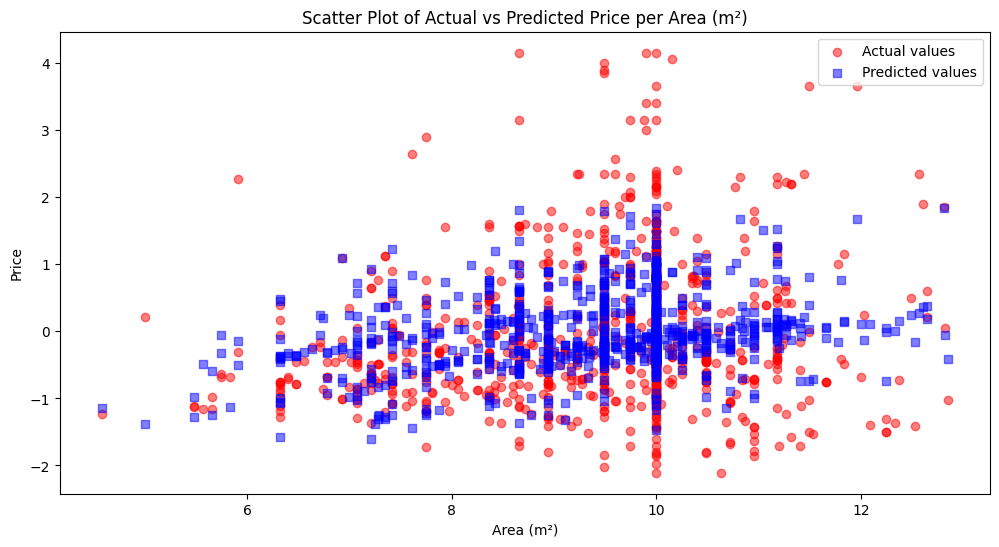

In [28]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area (m²)", "Area (m²)", "Price")

#### Conclusion

##### Advantages
<li>Provides a more stable solution than conventional Linear Regression by minimizing the magnitude of the coefficients, which improves accuracy and reduces the risk of overfitting</li>
<li>Maintains flexibility so that the model can adapt to new data</li>

##### Disadvantages
<li>More complex than Linear Regression</li>
<li>Not stable because changing random_state values ​​can cause model performance fluctuations</li>